### 빅데이터 실습

### COVID19 영향으로 중국인 관광객수 감소 분석

## 중간저장 엑셀파일 로드

### 

In [1]:
# 판다스 사용등록
import pandas as pd

In [ ]:
df_total = pd.read_excel('../day03/data/kto_total.xlsx')


In [7]:
condition = df_total['국적'] == '중국'
df_china = df_total[condition]


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
7217,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
7277,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
7337,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
7397,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


In [8]:
df_china.reset_index(drop=True,inplace=True) # 인덱스를 0부터 순서대로

#### 시각화

In [127]:
# 필요 라이브러리, 모듈 사용 등록
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams,font_manager,rc
import matplotlib
font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' #나눔고딕코딩체
font_name = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font',family=font_name) # 한글깨짐 현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스가 표시가 깨지는 걸 방지


In [103]:
sns.set_style('dark')

In [14]:
import warnings
warnings.filterwarnings('ignore')

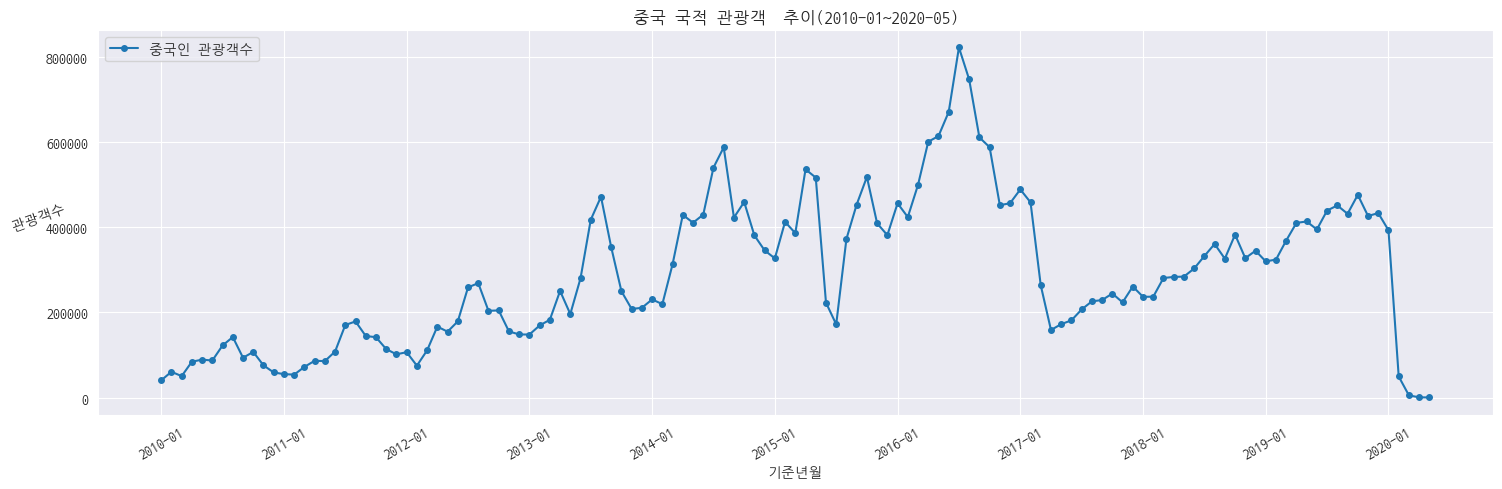

In [41]:
plt.figure(figsize=(18,5))
plt.plot(df_china['기준년월'],df_china['관광'],label='중국인 관광객수',marker='o',markersize= 4)
plt.title('중국 국적 관광객  추이(2010-01~2020-05)')
plt.legend(loc='upper left')
plt.xlabel('기준년월')
plt.ylabel('관광객수',rotation=20)
plt.xticks([f'{yyyy}-01' for yyyy in range(2010,2021)],rotation=30)
plt.show()

#### 관광객 수 TOP5 나라 시각화


In [36]:
countryList = ['중국','일본','대만','미국','홍콩']

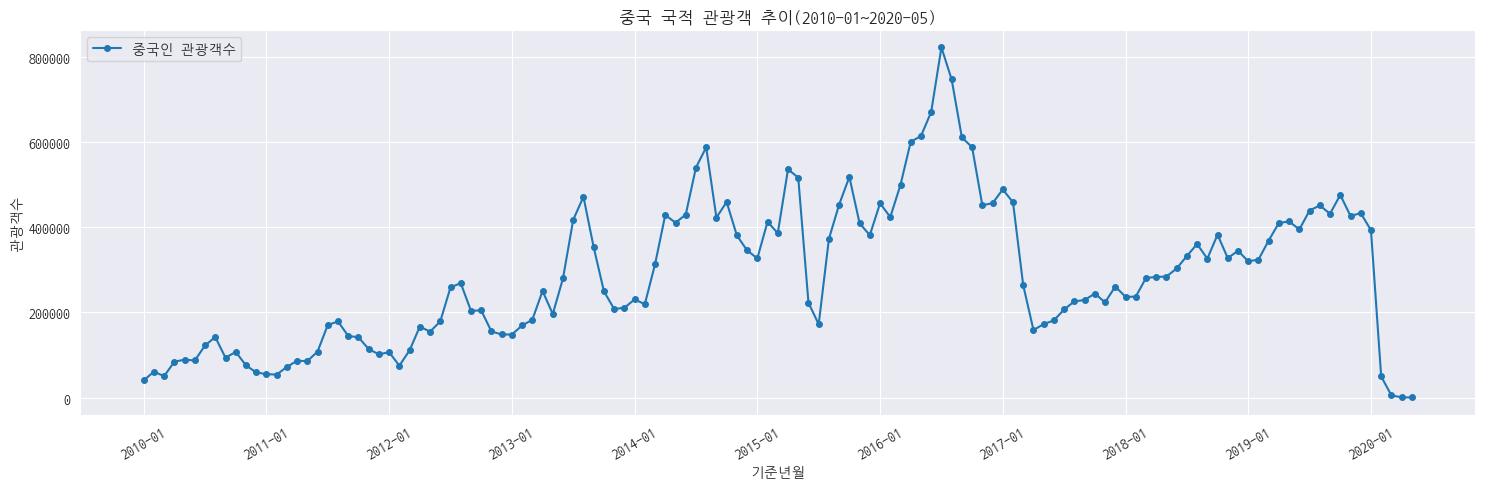

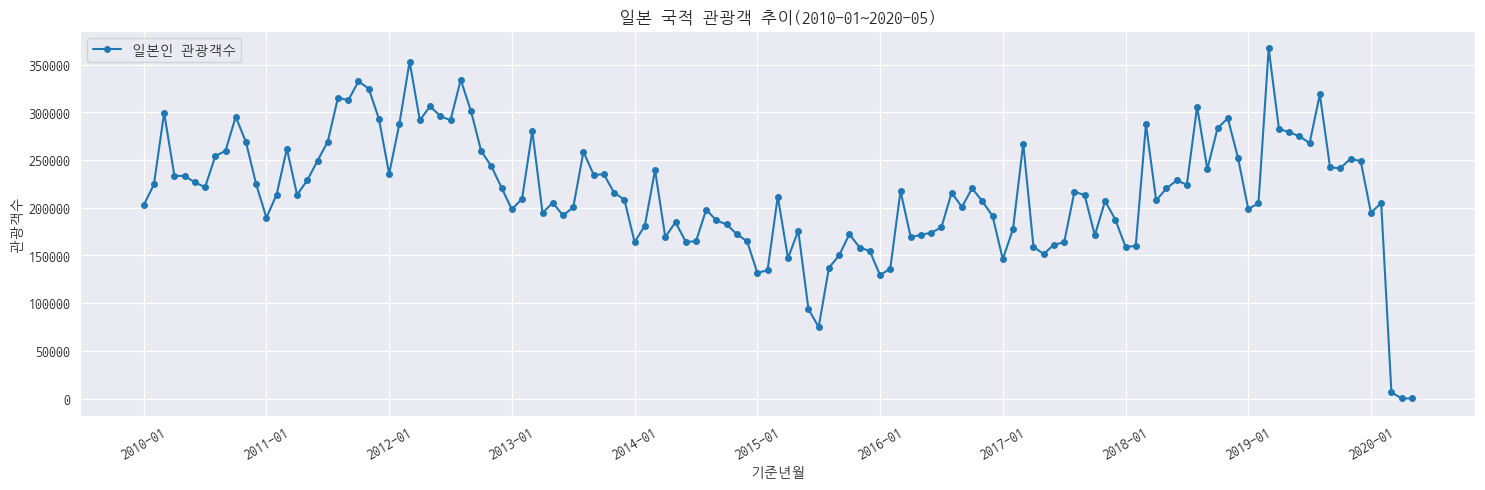

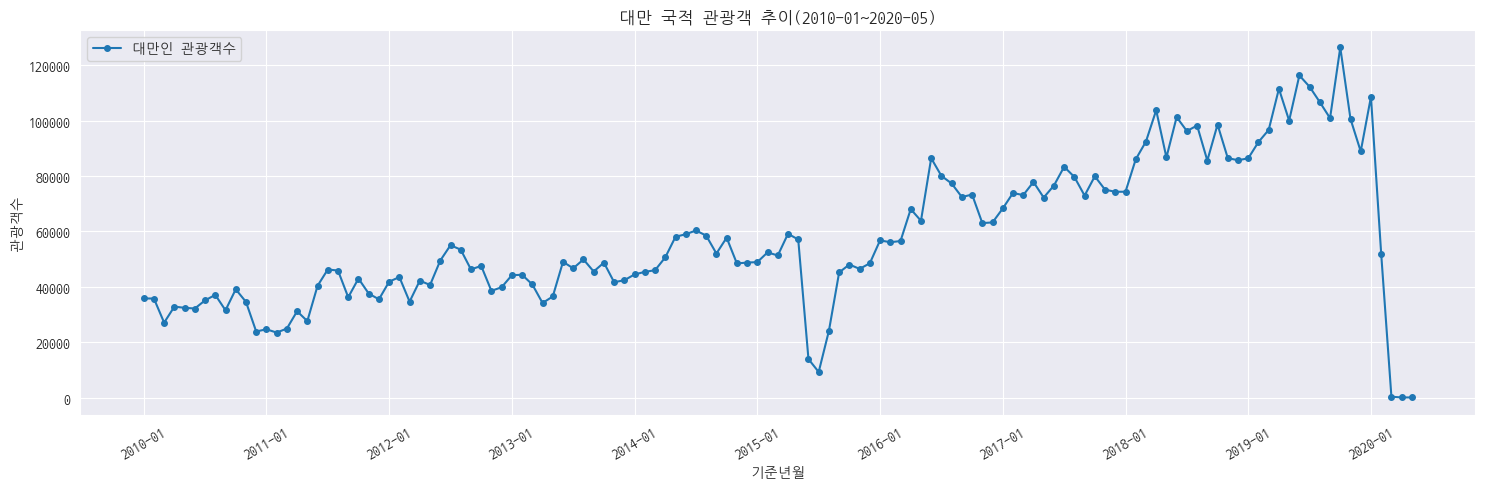

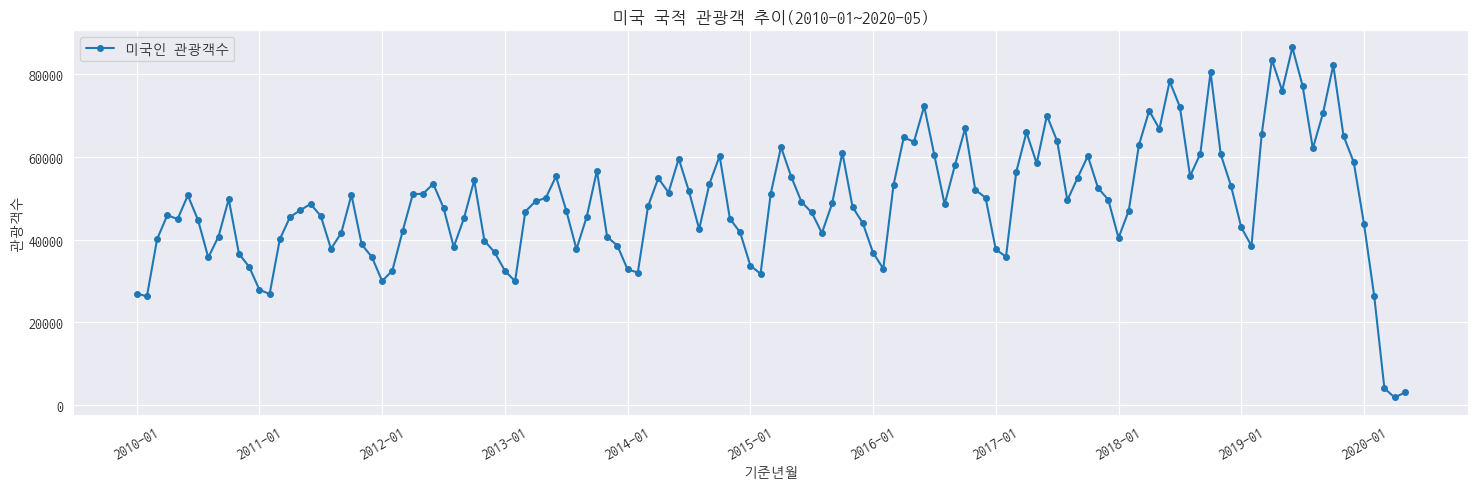

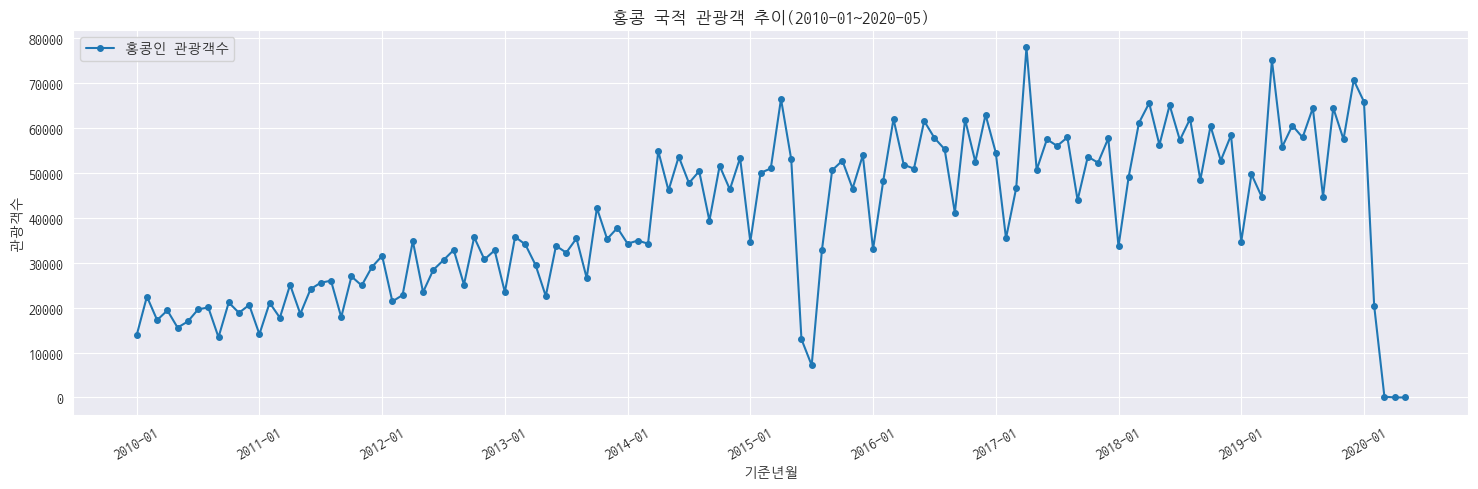

In [58]:
for country in countryList:
    # 각 나라별로 관광객수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]
    
    plt.figure(figsize=(18,5))
    plt.plot(df_filter['기준년월'],df_filter['관광'],label=f'{country}인 관광객수',marker='o',markersize= 4,)
    plt.title(f'{country} 국적 관광객 추이(2010-01~2020-05)')
    plt.legend(loc='upper left')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks([f'{yyyy}-01' for yyyy in range(2010,2021)],rotation=30)

plt.show()


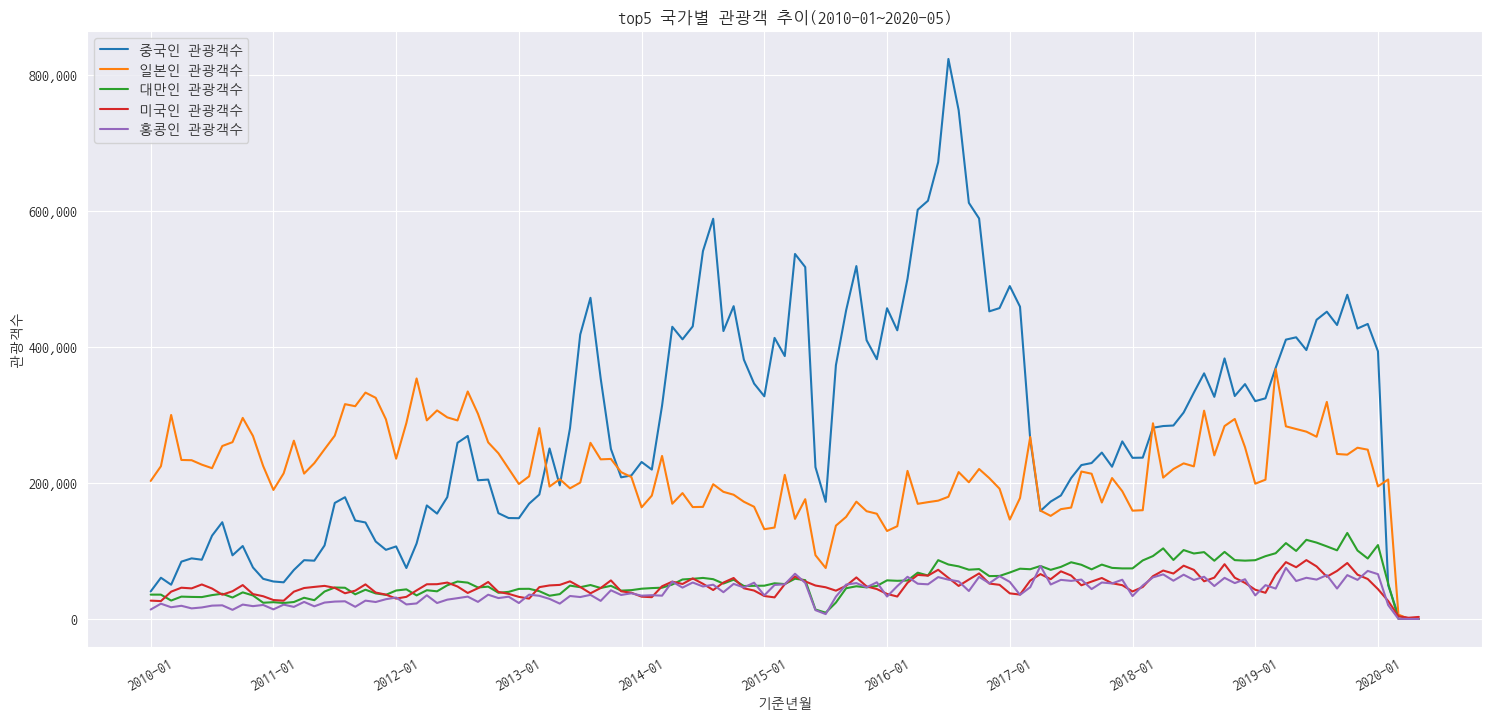

In [63]:
plt.figure(figsize=(18,8))
for country in countryList:
    # 각 나라별로 관광객수 필터링
    condition = df_total['국적'] == country
    df_filter = df_total[condition]
    plt.plot(df_filter['기준년월'],df_filter['관광'],label=f'{country}인 관광객수')
    plt.legend(loc='upper left')
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks([f'{yyyy}-01' for yyyy in range(2010,2021)],rotation=30)

plt.title('top5 국가별 관광객 추이(2010-01~2020-05)')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{x:,.0f}'for x in current_values])
plt.show()

#### 히트맵

년도와 월을 현재 하나의 컬럼으로 구성, 히트맵으로 사용시는 년도와 월을 분리해야 한다.

In [74]:
## 년도, 월 분리 '2010-01 slice(0,4) : 2010 , slice(5,7) :01

df_total['년도'] = df_total['기준년월'].str.slice(0,4)
df_total['월'] = df_total['기준년월'].str.slice(5,7)

In [76]:
condition = df_total['국적'] == '중국'
df_china = df_total[condition]

In [87]:
df_chinapivot = df_china.pivot_table(values='관광',index='년도',columns='월',aggfunc='sum')

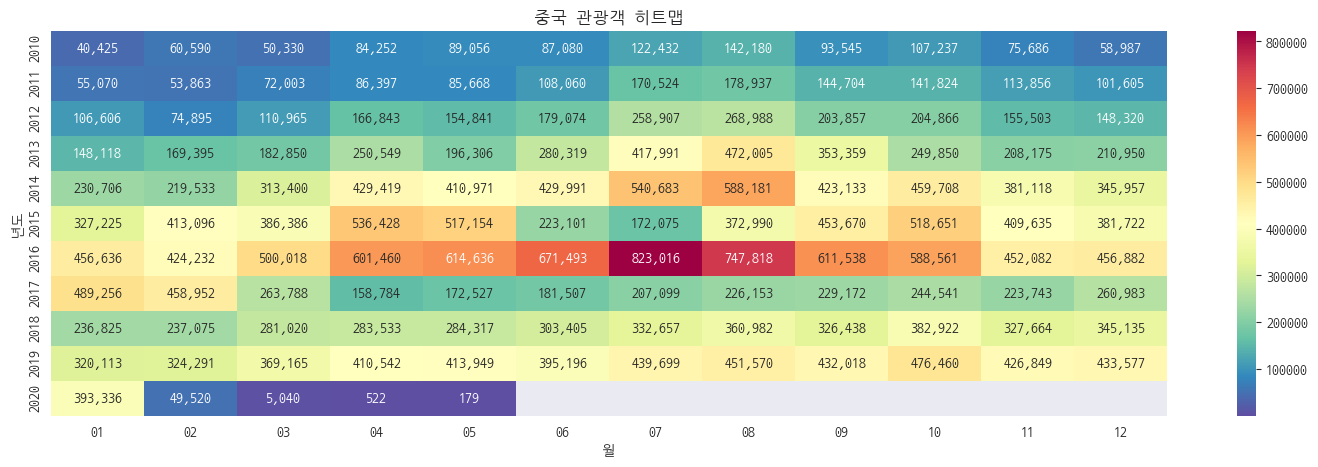

In [129]:
plt.figure(figsize=(18,5))
ax = sns.heatmap(df_chinapivot,annot=True,fmt=',.0f',cmap='Spectral_r')
plt.title('중국 관광객 히트맵')

# # for t in ax.texts:
#     t.set_text(f'{int(t.get_text()):,d}')

plt.show()

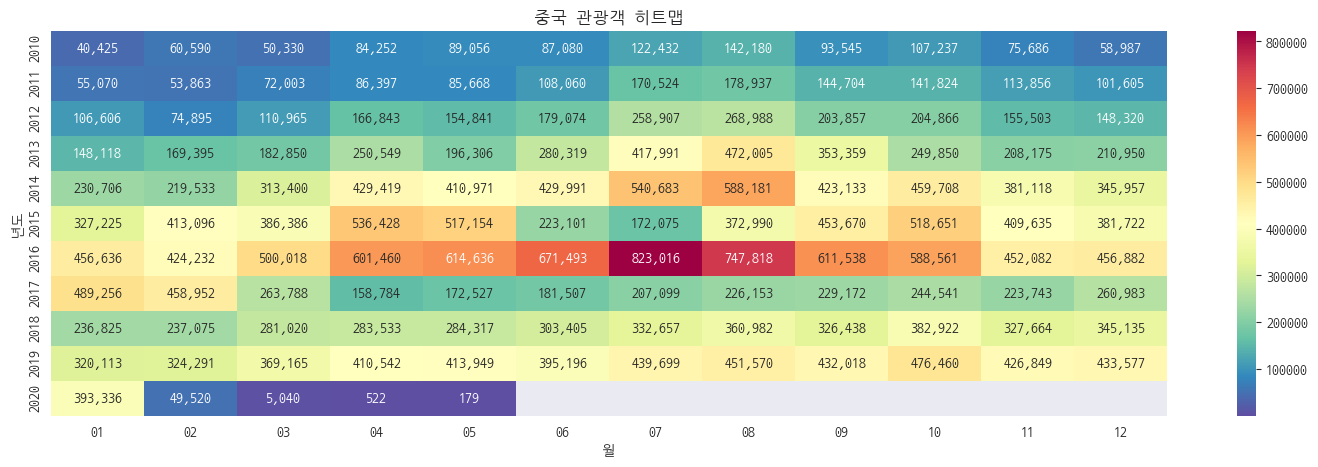

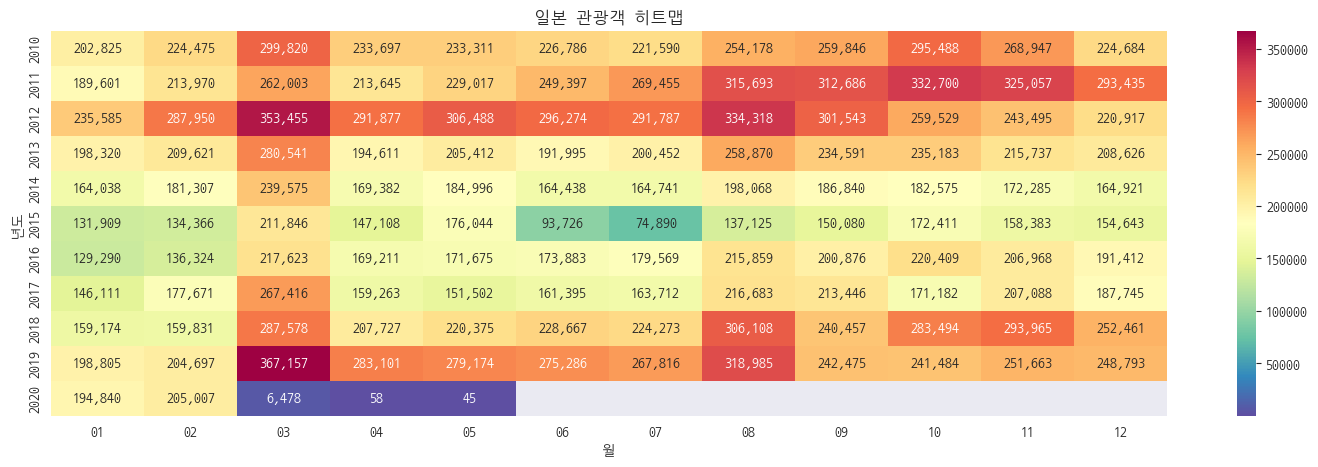

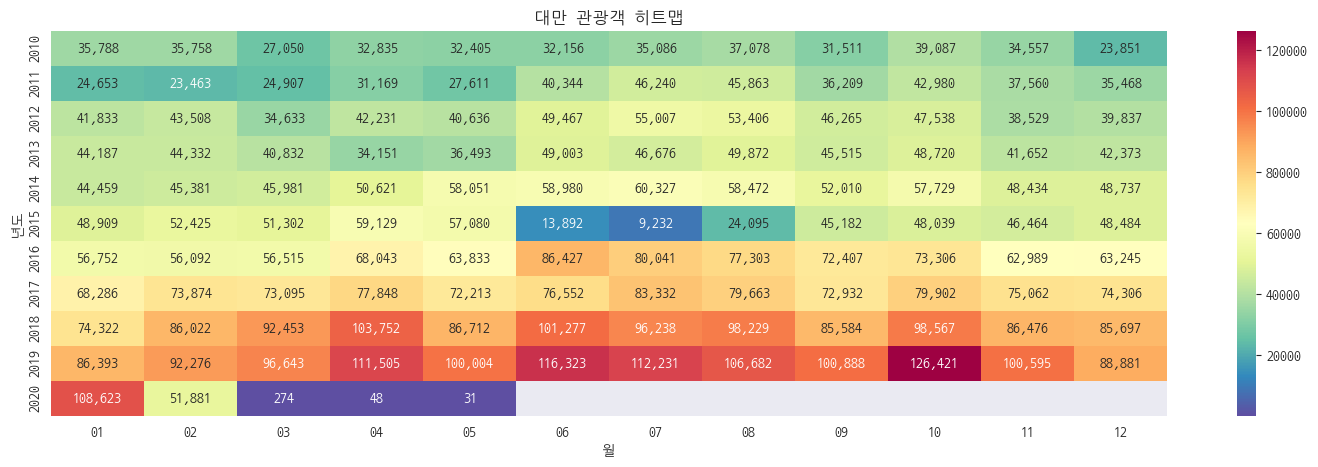

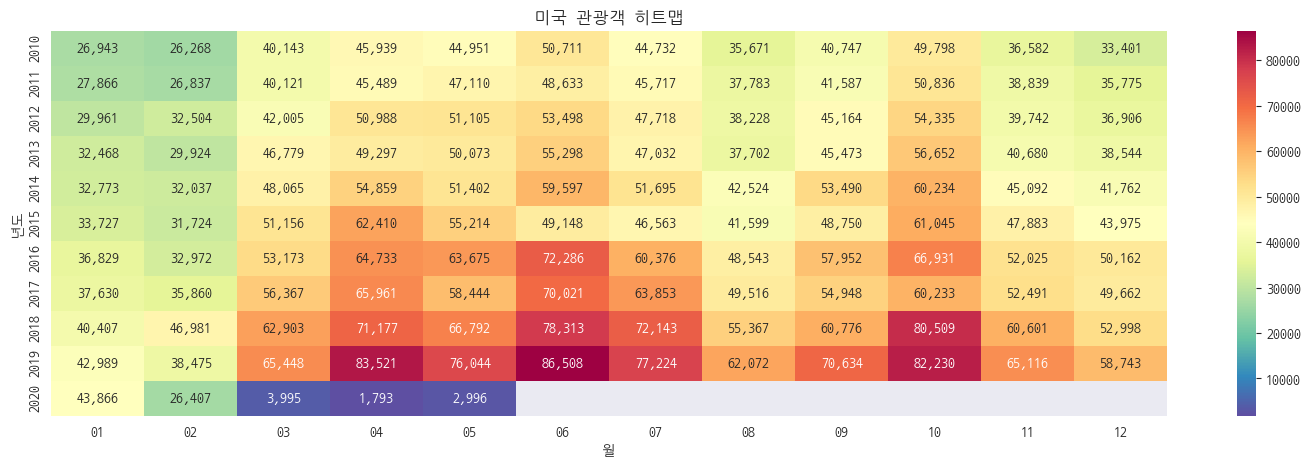

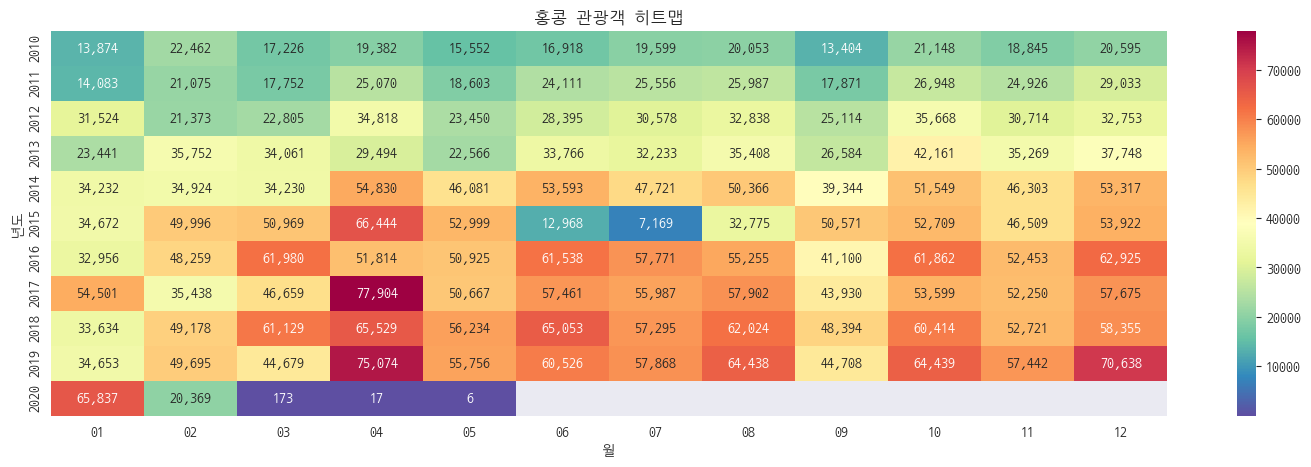

In [131]:

for country in countryList:
    # 각 나라별로 관광객수 필터링
    plt.figure(figsize=(18,5))
    condition = df_total['국적'] == country
    df_filter = df_total[condition]
    df_pivot = df_filter.pivot_table(values='관광',index='년도',columns='월',aggfunc='sum')
    ax= sns.heatmap(df_pivot,annot=True,fmt=',.0f',cmap='Spectral_r')
    ax.set(title= f'{country} 관광객 히트맵')

    plt.show()

#### 중국 관광객 시각화 차트, 히트맵으로 분석

- 2010년 이후로 꾸준히 증가
- 2017년 초에 큰폭으로 감수
- 매년 여름 관광객 수가 최대치
- 단 2015년 여름에 관광객 수가 큰 폭으로 감소
- 2020년 초 관광객 수가 0에 수렴

#### 인터넷 검색 > 구글링
1. 2015년 여름 관광객수 감소 이유 검색
    - 메르스 발병으로 인한 관광객수 감소 , top5 미국 외 모든 나라에서 동일하게 발생
2. 2017년 초 관광객 감소 이유 검색
    - 사드 보복으로 중국의 한국 여행 금지령
3. 2020년 3월부터 관광객 감소 이유 검색
    - 코로나 바이러스 영향, 모든 나라가 동일